<a href="https://colab.research.google.com/github/asepmuhidin/kriptografi/blob/main/stego_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image

In [2]:
# Baca citra cover, ekstrak pixel-pixel sebagai sebuah larik (array)
citra = Image.open("ahmad.jpg", 'r')

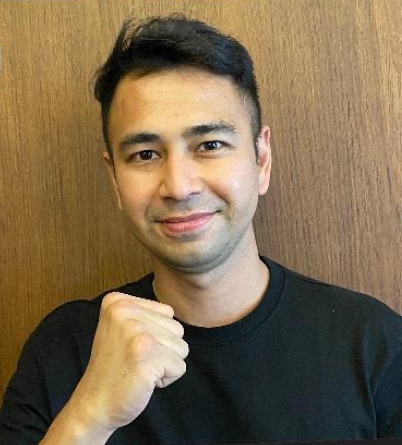

In [4]:
citra

In [8]:
citra.size

(402, 445)

In [9]:
lebar,tinggi=citra.size

In [18]:
len(list(citra.getdata()))

178890

In [20]:
a=[2,2,2]
b=[1,1,1]
c=a+b
c

[2, 2, 2, 1, 1, 1]

In [21]:
a=np.array([2,2,2])
b=np.array([1,1,1])
c=a+b
c

array([3, 3, 3])

In [22]:
larik_pixel = np.array(list(citra.getdata()))
larik_pixel

array([[154, 126,  87],
       [160, 132,  93],
       [165, 137,  98],
       ...,
       [ 32,  32,  30],
       [ 33,  32,  30],
       [ 33,  32,  30]])

In [23]:
larik_pixel.shape

(178890, 3)

In [24]:
citra.mode

'RGB'

In [25]:
n=larik_pixel.shape[1]
n

3

In [29]:
total_pixel = larik_pixel.size
total_pixel

536670

In [30]:
pesan = "hallo saya rapih amat " + "stego"
pesan

'hallo saya rapih amat stego'

In [33]:
ord("h")

104

In [34]:
format(104,"08b")

'01101000'

In [35]:
pesan_biner = ''.join([format(ord(i), "08b") for i in pesan])
pesan_biner

'011010000110000101101100011011000110111100100000011100110110000101111001011000010010000001110010011000010111000001101001011010000010000001100001011011010110000101110100001000000111001101110100011001010110011101101111'

In [36]:
jumlah_pixel_embed = len(pesan_biner)
jumlah_pixel_embed

216

In [46]:
# periksa apakah mencukupi untuk menyisipkan pesan
if jumlah_pixel_embed > total_pixel:
  print("ERROR: Ukuran citra tidak mencukupi untuk penyembunyian pesan")
else:
  # Sisipkan bit-bit pesan pada LSB setiap byte pixel
  index=0
  for p in range(total_pixel):
    for q in range(0, 2):
      if index < jumlah_pixel_embed:
        larik_pixel[p][q] = int(bin(larik_pixel[p][q])[2:9] + pesan_biner[index], 2)
        index = index + 1





In [38]:
bin(larik_pixel[0][0])

'0b10011010'

In [39]:
bin(larik_pixel[0][0])[2:9]

'1001101'

In [45]:
int(bin(larik_pixel[0][0])[2:9]+pesan_biner[0],2)

154

In [47]:
larik_pixel.shape

(178890, 3)

In [48]:
larik_pixel = larik_pixel.reshape(tinggi, lebar, n)

In [49]:
larik_pixel.shape

(445, 402, 3)

In [51]:
stego_image = Image.fromarray(larik_pixel.astype('uint8'), citra.mode)
stego_image.save("stego_rapi_ahmad.jpg")
print("Penyisipan pesan ke dalam citra berhasil")

Penyisipan pesan ke dalam citra berhasil
